#### Note: all the definitions and formulae used in this post are specific to the context, and different authors may take slightly different variations of the same. Please check the context and exact definition of the same in your problem, before making a comparison or using this code.

In [26]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import networkx as nx

import seaborn as sns #optional, for better visualization

## Construction of the Recurrence Network from given time series

For the chosen recurrence threshold $\varepsilon$, the recurrence matrix $R$ is constructed such that if two points $i$ and $j$ on the attractor lie within distance $\varepsilon$ of each other, we set the corresponding matrix element $R_{ij}$  to be 1, and 0 otherwise. i.e

$R_{ij} = \Theta \left ( \varepsilon-\left \| \vec{v_{i}}- \vec{v_{j}} \right \| \right )$

where $\vec{v_{i}}$ and $\vec{v_{j}}$ are the corresponding vectors of $i$ and $j$ in the phase space, and $\Theta$ is the Heaviside step function.

The adjacency matrix $A$ of a Recurrence Network is obtained from $R$ as:

$A_{ij} = R_{ij}-\delta _{ij}$

where $\delta_{ij}$ is the Kronecker delta function that is inserted to avoid self-links in the network. This construction results in an unweighted and undirected network of size N, where N is the number of points on the attractor in phase space.

We will take N = 2000, and $\varepsilon = 5$ for the Rössler system, but these will change depending on given system. Play around with the threshold and see what you get!

In [41]:
# load the time series

time_series = np.loadtxt('rossler_chaotic.txt')
print(time_series.shape)

(50000, 3)


## Recurrence Plot
A visual representation of the recurrence patterns in a given system. Details at http://www.recurrence-plot.tk/glance.php

In [42]:
#construction of recurrence plot

from scipy.spatial import distance
rec_threshold = 5
def recurrence_plot(new_v,rec_thr):
    rp = (distance.cdist(new_v,new_v,'euclidean')<=rec_thr).astype(int)
    
    #the Recurrence Plot
    plt.figure().set_size_inches(8,8)
    plt.title("Recurrence Plot")
    plt.imshow(rp,origin='lower', cmap='Greys',vmin=0,vmax=1)
    plt.xlabel('Time')
    plt.ylabel('Time')
    plt.show()
    #plt.savefig(file+"RP.jpg")
    return rp

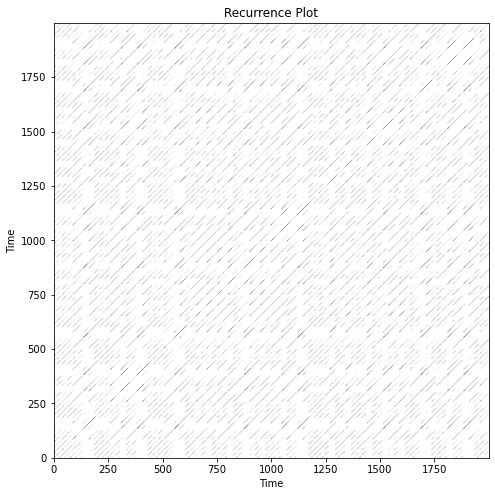

In [43]:
rec_plot = recurrence_plot(time_series[-10000::5],rec_threshold)

From recurrence plot, we remove the diagonal elements to get recurrence matrix. This matrix serves as the adjacency matrix for the recurrence network. 

Reason: to avoid self-loops in the network.

In [44]:
adj_matrix_RN = rec_plot
np.fill_diagonal(adj_matrix_RN,0)

rec_nw = nx.from_numpy_matrix(adj_matrix_RN)

### To see the network
The network is very large, hence we show only a selected number of nodes for clarity

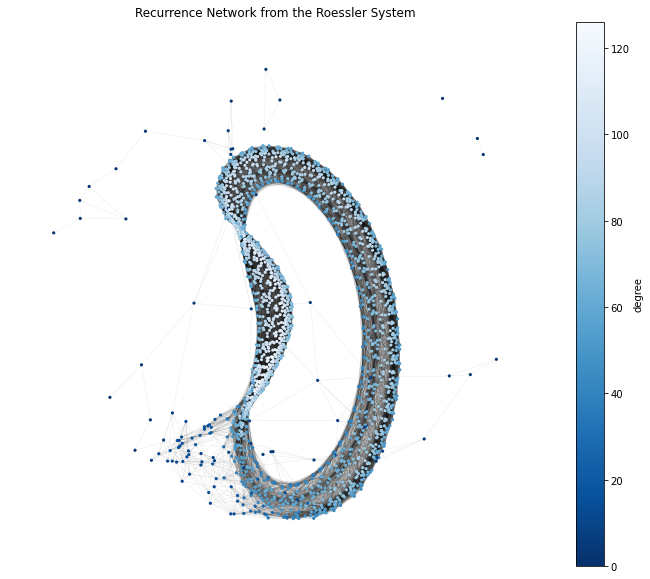

In [53]:
pos = nx.spring_layout(rec_nw,k=0.15,iterations=100)
# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos: #helps in color code nodes
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

#color by degree
p = dict(nx.degree(rec_nw))
plt.figure().set_size_inches(12,10)
plt.title('Recurrence Network from the Roessler System')
nx.draw_networkx_edges(rec_nw, pos, nodelist=[ncenter], alpha=0.4,width=0.1)
nx.draw_networkx_nodes(rec_nw, pos, nodelist=list(p.keys()),
                       node_size=10,edgecolors='k',linewidths=0.01,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)
        
vmin = np.asarray(list(p.values())).min()
vmax = np.asarray(list(p.values())).max()

sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues_r, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cb = plt.colorbar(sm)
cb.set_label('degree')
sm.set_array([])
plt.axis('off')
plt.show()